## Finance Complaint Project

The CFPB is a US based agency which comes into action when dispute arises between a financial institution and the consumer . The company gets the narrative of the disput using a web form , passes it to the destination company and asks for a reply either directly to the agency or to the consumer . 

This project is made to process the issues text written in the complaint and features in the dataset to predict if the consumer is going to dispute or not . 

Use Case : This analysis would go through the issues , make classification whether the consumer will dispute or not and will help the company to prioritize the complaints . 

#### Data Collection & Loading

Importing Libraries

In [1]:
import pandas as pd ;                   # Importing the pandas module
import numpy as np ;                    # Importing the numpy module
import matplotlib.pyplot as plt ;       # Importing the matplotlib module
import seaborn as sns ;                 # Importing the seaborn module
import plotly.express as px ;           # Importing the plotly module
import warnings ;                       # Importing the warnings module

warnings.filterwarnings("ignore")       # Ignores all warnings 

%matplotlib inline  
pd.set_option('display.max_columns',50)       # allows customization of display settings making a maximum number of columns to be shown when printing a DataFrame to be 50 .

Loading the Dataframe 

In [2]:
df = pd.read_csv("complaints.csv")  # Reading the CSV file in dataframe using pandas

In [3]:
df_filtered = df.dropna(subset=['Consumer disputed?'])      # Droping the records that has null values in "Consumer disputed?" column .

df= df_filtered;                                            # Re-assigning the new dataset to df(DataFrame) 

#### Data Exploration & Cleaning

In [4]:
Total_rows= df.shape                # Getting a total numnber of all the rows and columns  in the dataset  
print(Total_rows)

(768306, 18)


In [5]:
df.head(5)          # Getting the first 5 records of the dataset  .  

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2382,2012-11-01,Credit reporting,NaN,Incorrect information on credit report,Account terms,NaN,NaN,"EQUIFAX, INC.",KS,66701,Older American,NaN,Web,2012-11-05,Closed with explanation,Yes,No,183168
2836,2016-12-28,Credit reporting,NaN,Incorrect information on credit report,Personal information,NaN,NaN,"EQUIFAX, INC.",NY,10541,NaN,Consent not provided,Web,2016-12-28,Closed with explanation,Yes,No,2266701
16418,2012-01-10,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,92037,NaN,NaN,Web,2012-01-11,Closed without relief,Yes,Yes,12040
27542,2014-12-02,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"I.C. System, Inc.",TX,77070,NaN,NaN,Web,2014-12-02,Closed with explanation,Yes,No,1138378
27560,2015-04-01,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,ZWICKER & ASSOCIATES,TX,79109,NaN,Consent not provided,Web,2015-04-01,Closed with non-monetary relief,Yes,No,1311564


In [6]:
df.tail(5)          # Getting the last 5 records of the dataset  . 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
7837731,2016-01-19,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,JPMORGAN CHASE & CO.,TX,76002,NaN,Consent not provided,Web,2016-01-19,Closed with explanation,Yes,No,1748209
7837732,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
7837734,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
7837735,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118
7837736,2014-11-10,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",CA,95616,NaN,NaN,Postal mail,2014-11-25,Closed with explanation,Yes,No,1110751


In [7]:
Column_names = df.columns           # Getting a list of all columns in the DataFrame . 
print(Column_names)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


Checking for null values

In [8]:
df.isnull().sum().sort_values(ascending =False)         # Getting a sum of all missing values in different columns and arranging in ascending order .

Tags                            659829
Consumer complaint narrative    604295
Company public response         572597
Consumer consent provided?      470506
Sub-issue                       455359
Sub-product                     235159
State                             5650
ZIP code                          3857
Product                              0
Date received                        0
Company                              0
Issue                                0
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

Converting the Date Columns to Datetime Format

In [9]:
# Converting "Date received " column to datetime format from object so that it help during Trend Analysis . 

df['Date received'] = pd.to_datetime(df['Date received']);

In [10]:
# Converting "Date sent to company" column to datetime format from object so that it help during Trend Analysis . 

df['Date sent to company'] = pd.to_datetime(df['Date sent to company'] )

In [11]:
df['Complaint ID'] = df['Complaint ID'].astype(object)

ci = df['Complaint ID'] .dtype
print(ci)

object


Unique values in target column  

In [12]:
(df['Consumer disputed?'].value_counts(normalize = True)*100).round(3)  # Getting the percentage of unique values in "Consumer disputed?" column . 

Consumer disputed?
No     80.688
Yes    19.312
Name: proportion, dtype: float64

In [13]:
df.describe(include = 'object').T               # Gives the details of all the columns of the dataset 

,count,unique,top,freq
Product,768306,13,Mortgage,226879
Sub-product,533147,50,Other mortgage,86627
Issue,768306,99,"Loan modification,collection,foreclosure",112306
Sub-issue,312947,61,Account status,37057
Consumer complaint narrative,164011,160917,I am filing this complaint because Experian ha...,103
Company public response,195709,10,Company has responded to the consumer and the ...,95588
Company,768306,4279,"BANK OF AMERICA, NATIONAL ASSOCIATION",65992
State,762656,62,CA,110612
ZIP code,764449,28262,XXXXX,9692
Tags,108477,3,Older American,61474


In [14]:
df.info()                   # Gives the Datatypes of the columns of the Dataset

<class 'pandas.core.frame.DataFrame'>
Index: 768306 entries, 2382 to 7837736
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 768306 non-null  datetime64[ns]
 1   Product                       768306 non-null  object        
 2   Sub-product                   533147 non-null  object        
 3   Issue                         768306 non-null  object        
 4   Sub-issue                     312947 non-null  object        
 5   Consumer complaint narrative  164011 non-null  object        
 6   Company public response       195709 non-null  object        
 7   Company                       768306 non-null  object        
 8   State                         762656 non-null  object        
 9   ZIP code                      764449 non-null  object        
 10  Tags                          108477 non-null  object        
 11  Consumer conse

In [15]:
# Replacing all empty spaces with a NaN value for standard data . 

df.replace("",np.nan,inplace=True)

Checking for the count of null values in each Column 

In [16]:
# Getting the percentage of null values in each column of a Dataset .

(df.isnull().sum().div(len(df))*100).sort_values(ascending = False)

Tags                            85.881016
Consumer complaint narrative    78.652907
Company public response         74.527207
Consumer consent provided?      61.239402
Sub-issue                       59.267922
Sub-product                     30.607466
State                            0.735384
ZIP code                         0.502014
Product                          0.000000
Date received                    0.000000
Company                          0.000000
Issue                            0.000000
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

In [17]:
# Droping the columns from dataset that have maximum null values as they are not going to help us in the analysis . 

DropColumn = ['Tags','Consumer complaint narrative', 'Company public response','Sub-issue', 'Sub-product', 'ZIP code']

df= df.drop(DropColumn , axis = 1) 

Standazing the Textual Data

In [18]:
# Standardizing the product column .  

df['Product'] = df['Product'].str.lower().str.strip()

#### Exploratory Data Analysis (EDA)

Visualizing the Target variable ('Consumer disputed?')

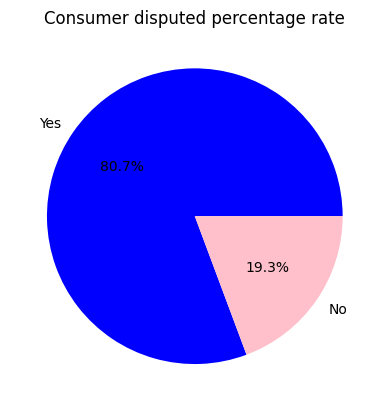

In [19]:
labels = ['Yes', 'No']                  # Defining labels
colors = ['Blue', 'pink']               # Defining colors

# Defining Pie chart
plt.pie((df['Consumer disputed?'].value_counts().div(len(df)))*100,
labels = labels , 
colors = colors ,
autopct='%1.1f%%')
plt.title("Consumer disputed percentage rate")

# Showing Pie chart
plt.show()

- From the above visualization it is clear that the target variable is imbalanced .

An imbalanced variable is the one which has extremely uneven distribution of its unique values .  

Products on which Complaint were made . 

In [20]:
# Defines the top 10 products on which complaints were made . 

Top_companies = (df['Product'].value_counts(normalize = True)*100).sort_values(ascending= False).head(10)

print(Top_companies)

Product
mortgage                   29.529771
debt collection            18.964970
credit reporting           18.277744
credit card                11.608526
bank account or service    11.220139
student loan                4.233730
consumer loan               4.109561
payday loan                 0.721197
money transfers             0.696858
prepaid card                0.497068
Name: proportion, dtype: float64


Visualizing the top products on which complaints were made using a Bar chart  . 

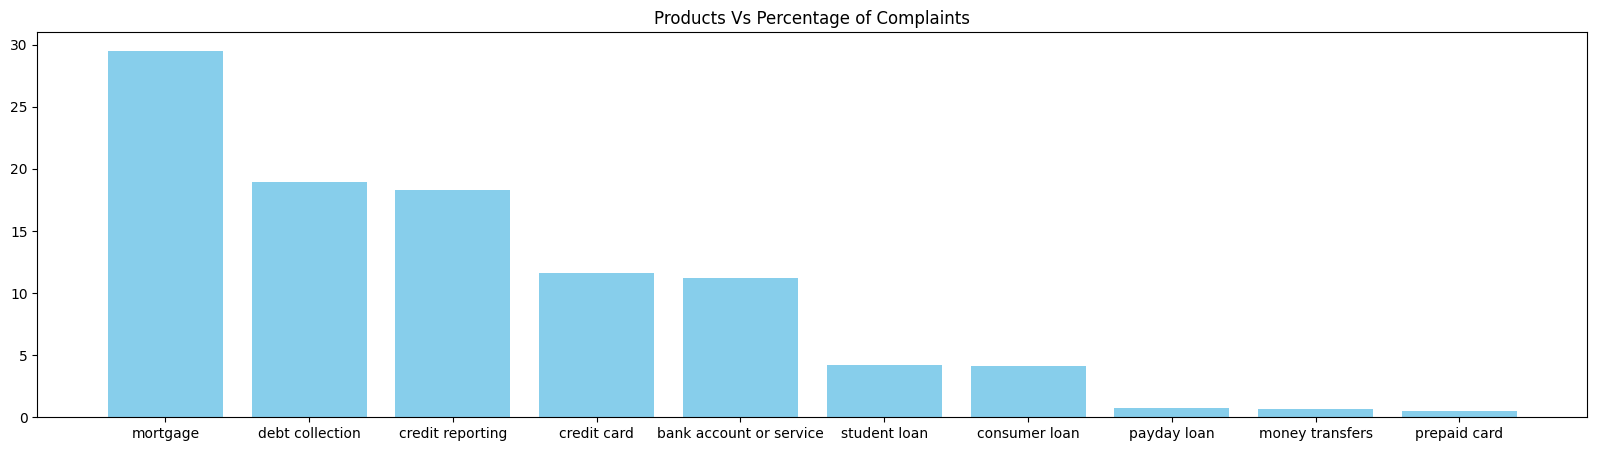

In [21]:
# Defining the x and y axis of bar chart
values = Top_companies
products = values.index


# Defining the bar chart
plt.figure(figsize=(20,5))
plt.bar(products, values , color = 'skyblue')


# Defining the Bar chart title
plt.title("Products Vs Percentage of Complaints")


# showcasing the bar chart
plt.show()


From the above viusualization we can conclude that 

- Mortgage product comprises of about 30% of total complaints received . 
- It is followed by "Debt Collection" which comprises of about 19% of the total complaints received . 

States in US and its impact on target Variable . 

In [22]:
# Defines the top 10 States on which complaints were registered .
Top_states = (df['State'].value_counts(normalize= True)*100).sort_values(ascending= False).head(10)

print(Top_states)

State
CA    14.503525
FL     9.648518
TX     7.788177
NY     6.887640
GA     4.751421
NJ     4.001411
IL     3.694588
PA     3.608442
VA     3.214293
MD     3.149520
Name: proportion, dtype: float64


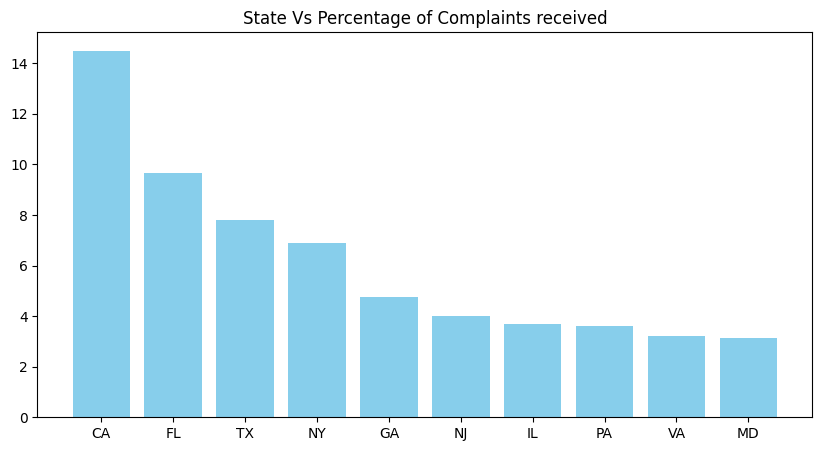

In [23]:
# Defining the x and y axis of bar chart
values = Top_states
state = Top_states.index


# Defining the bar chart
plt.figure(figsize= (10,5))
plt.bar(state , values  , color = 'skyblue')


# Defining the Bar chart title
plt.title('State Vs Percentage of Complaints received')


# showcasing the bar chart
plt.show()

From the above visualization we can see that 

- About 14.5% of the complaints recevied are from CA (California) state of US . 
- And this is being followed by FL (Florida) which count for about 9.6% of the total complaints received. 

Company response to consumer with regards to the Target Variable

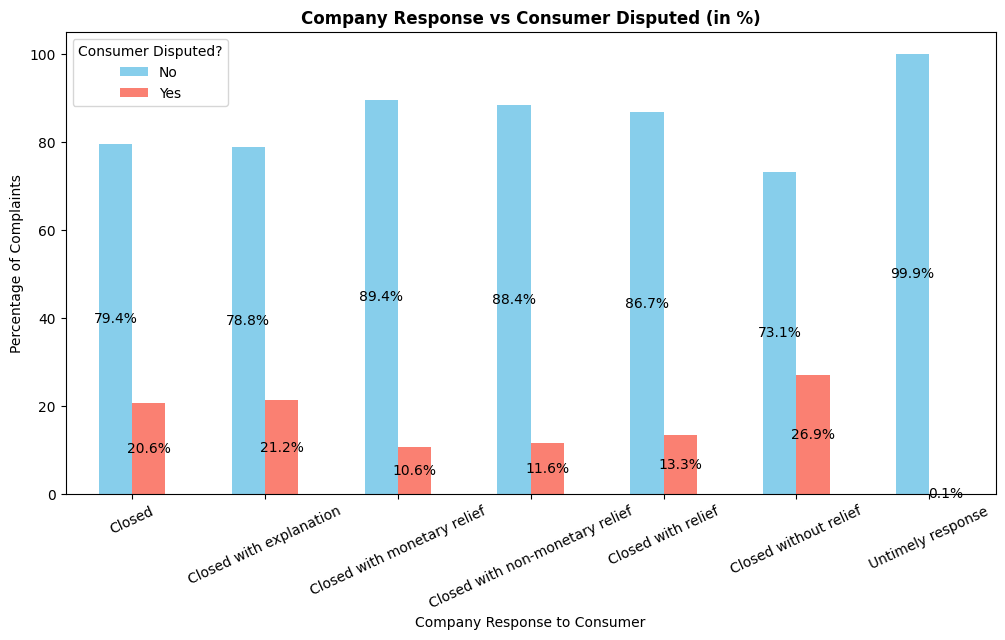

In [24]:
# Grouping the data on the basis of how company responded and if the consumer disputed the response or not .  
response_vs_dispute = df.groupby(['Company response to consumer','Consumer disputed?']).size().unstack()

#Converting the above count to percentage format .
response_vs_dispute_percentage = (response_vs_dispute.div(response_vs_dispute.sum(axis=1), axis=0) * 100).round(2)

ax = response_vs_dispute_percentage.plot(kind = 'bar', stacked= False,  figsize=(12, 6), color=['skyblue', 'salmon'])

# Step 3: Add percentage labels on each bar segment
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

# Step 4: Customize chart
ax.set_xlabel("Company Response to Consumer")
ax.set_ylabel("Percentage of Complaints")
ax.set_title("Company Response vs Consumer Disputed (in %)", fontweight= "bold")
ax.tick_params(axis='x', rotation=25)  # Rotate labels for better readability
ax.legend(title="Consumer Disputed?", labels=['No', 'Yes'])

#showcasing the bar graph 
plt.show() 



Insights:

- From the above analysis we can see that "closed with relief" has the maximum number of disputed cases counting for 26.9% . It suggests that consumers expect compensation or action from the company. And the company should work in this regards in order to minimize the number of disputed complaints.

- Following this is the "Closed with explanation" cases which has 21.2% of disputed cases .It indicates that customers are dissatisfied even when given an explanation.So the company should work on giving a much satisfing explanation to the consumers to decrease cases of dispute.

Complaint Year and Disputed Consumer Count

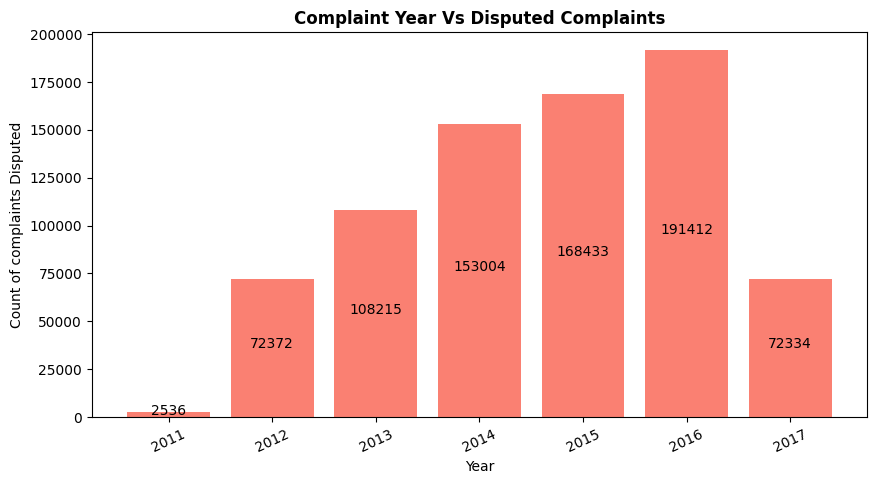

In [25]:
# Extracting Year from the "Date received" column
df['Year'] = df['Date received'].dt.year

# Getting the number of complaints received in different years 
Year_count = df['Year'].value_counts()

Year = Year_count.index             # Extracting the unique values of years 

# Defining the bar graph
fig, ax= plt.subplots(figsize=(10,5))
bars = ax.bar(Year ,Year_count,color= "salmon")

#Custamization of Bar Graph
ax.bar_label(bars,label_type='center' ,padding=3)
plt.title("Complaint Year Vs Disputed Complaints", fontweight= "bold")
plt.xlabel("Year")
plt.ylabel("Count of complaints Disputed")
plt.xticks(rotation =25)

# Showcasing the graph 
plt.show()


Insights:

- As per the above analysis we can see that maximum number complaints were received in the year of 2016.
- Complaints were least in the year 2017 and 2011 . 

Complaint Month and Disputed Consumer Count

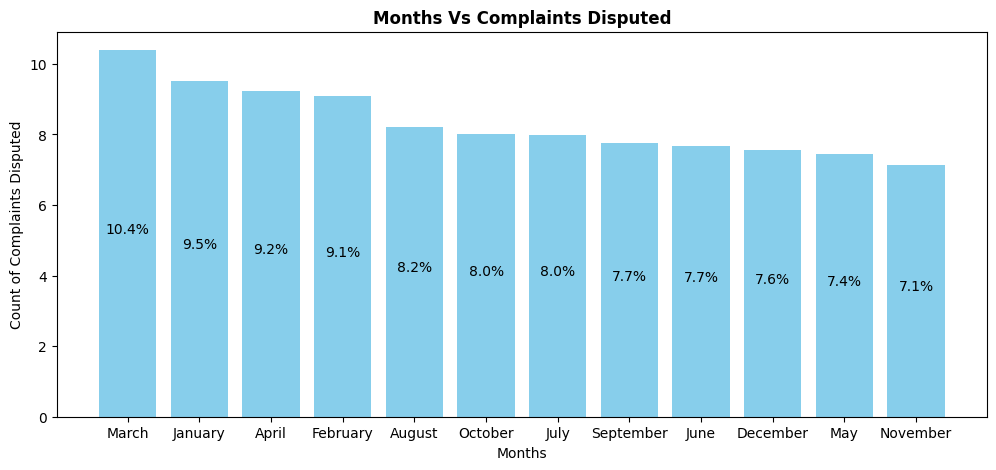

In [26]:
# Extracting months from the "Date Received" column
df['Month'] = df['Date received'].dt.strftime('%B')

#Getting the number of complaints getting in each month
value = df['Month'].value_counts(normalize= True)*100
months = value.index

# Creation of Bar graphs
fig , ax= plt.subplots(figsize=(12,5))
bars = ax.bar(months,value , color= "skyblue")

# Customization of bar Graph
plt.title("Months Vs Complaints Disputed", fontweight= "bold")
plt.xlabel("Months") 
plt.ylabel("Count of Complaints Disputed") 
ax.bar_label(bars,fmt= '%.1f%%'  ,label_type='center' ,padding=3)

# Showcasing the Bar graph
plt.show()


Insights:

- As per the above analysis we can see that march has highest number of complaints making it 10.4% of complaints in March month . 
- which is then followed by January months counting upto 9.5% of the disputed complaints .

Complaints submitted via 
- By what source the complaints were submitted ?

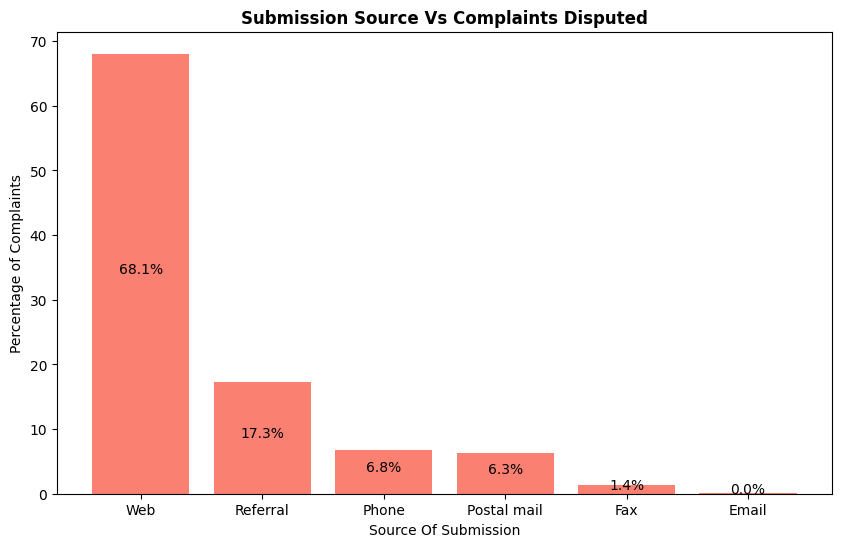

In [27]:
# Extracting the count of Submissions of complaints via different sources 
submission= df['Submitted via'].value_counts(normalize= True)*100 
category= submission.index

# Creation of Bar graphs
fig , ax = plt.subplots(figsize=(10,6))
bars= ax.bar(category , submission ,  color= "salmon")
ax.bar_label(bars, fmt='%.1f%%', label_type= 'center', padding = 3 )

# Customizing the bar chart 
plt.title('Submission Source Vs Complaints Disputed' ,fontweight= "bold")
plt.xlabel('Source Of Submission')
plt.ylabel('Percentage of Complaints')

# Showcasing the Bar graph
plt.show()

Insights:

- As analysised above we can see that maximum percentage accounting for 68.1% of the complaints were registerd through web source . 
- Following this is through referral source , which counts for 17.3% of the complaints . 

Impact of Timely response in disputed Cases 

Text(0, 0.5, 'Count of Complaints')

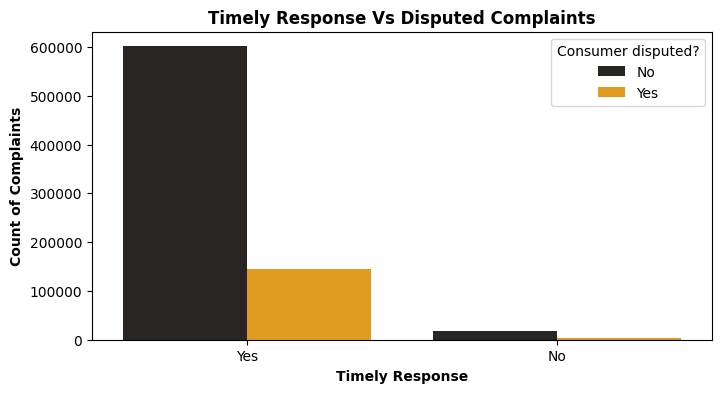

In [28]:
# Creation of count plot
plt.subplots(figsize=(8,4))
sns.countplot(data = df , x= 'Timely response?',hue= 'Consumer disputed?' ,color= 'orange')

# Customizing the count plot
plt.title('Timely Response Vs Disputed Complaints', fontweight ='bold')
plt.xlabel('Timely Response', fontweight= 'bold')
plt.ylabel('Count of Complaints', fontweight= 'bold')


Insights:

- From the above analysis we can see that when the companies have responded in a timely manner the disputes complaint cases are low . 
- So the companies should ensure to respond their customer on a timely basis to reduce disputes .


Consumer consent provided and it's effect on Target Column

Text(0, 0.5, 'Count of Complaints')

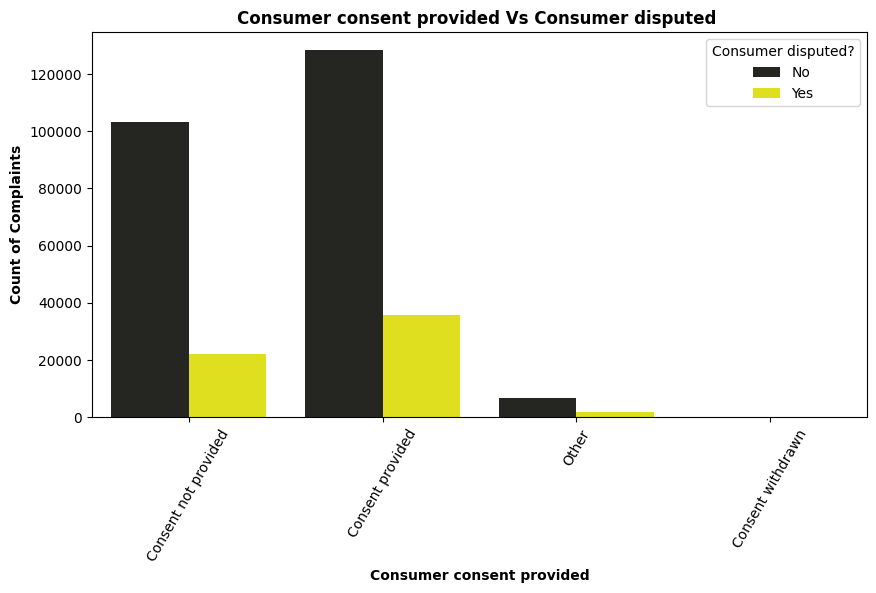

In [29]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(data= df , x= 'Consumer consent provided?' , color= 'yellow', hue= 'Consumer disputed?')
plt.title("Consumer consent provided Vs Consumer disputed ", fontweight= 'bold')
plt.xticks(rotation= 60)
plt.xlabel("Consumer consent provided",fontweight= 'bold')
plt.ylabel("Count of Complaints", fontweight= 'bold')

Insights:

- As per the above analysis we can see that maximum consumers have disputed when consent was provided because they wanted reports to be public.

Final Report 

- Dataset has been collected from Consumer Finance US government.
- "Tags" , "Consumer complaint narrative" , "Company public response" , "ZIP code" , "Sub-product" , "Sub-issue"  are the columns that can be removed as don't help in the model . 
- "company" its a name column and can be removed as it contains 4284 unique companies and it can't be used in the model . 
- New features like "Months" and "Year" are created which demonstrated a connection between the complaints disputed by customers on monthly and yearly basis . 
- "Issue" is a text column so text processing can be done and vectorized by tfidf for model training . 
- Rows are removed on the basis of columns containing the maximum number of null values to get an acurate analysis results.




#### End of the Project